In [1]:
import numpy as np
from qiskit import *
from qiskit.quantum_info import Operator, Pauli, SparsePauliOp
from tabulate import tabulate
from itertools import combinations
import math, cmath
import time

In [2]:
def tb0_JW(N,e,t) : 
    strings = []
    opt = SparsePauliOp.from_sparse_list([("I", [0], 0)], num_qubits=N)  
    for k in range(N) : 
        a0='I'*(N)
        a1 = 'I'*(k)+'Z' +'I'*(N-k-1)

        b0='I'*N
        b0_list = list(b0)
        b0_list[k] = 'X'
        b0_list[(k+1)%N] = 'X'
        new_b0 = ''.join(b0_list)

        b1='I'*N
        b1_list = list(b0)
        b1_list[k] = 'Y'
        b1_list[(k+1)%N] = 'Y'
        new_b1 = ''.join(b1_list)

        strings.append([a0,a1,new_b0,new_b1])
        val = 1
        if N==2 and k==1 : 
            val = 0
        opt += SparsePauliOp.from_list([(a0, 0.5*e[k]), (a1, -0.5*e[k]),(new_b0, 0.5*t*val),(new_b1, 0.5*t*val)])
    return opt  


In [3]:
N=2
e=[1]*N
t=7
H_op = tb0_JW(N,e,t)

In [4]:
# circ = QuantumCircuit(N)
# #circ.initialize('1101',circ.qubits)
# time=1
# circ.hamiltonian(H_op,time,list(range(N)))
# #circ.decompose(reps=2).draw('mpl')


# backend = Aer.get_backend('unitary_simulator')
# job = execute(circ, backend, shots=1000)
# result = job.result()

# U = result.get_unitary(circ,10).data


In [5]:
from qiskit.circuit.library import EfficientSU2
from qiskit.algorithms.time_evolvers.variational import ImaginaryMcLachlanPrinciple
from qiskit.algorithms import TimeEvolutionProblem
from qiskit.algorithms import VarQITE
from qiskit.primitives import Estimator
from qiskit.quantum_info import Statevector
from qiskit.algorithms import SciPyImaginaryEvolver
import pylab
from qiskit.algorithms.gradients import ReverseEstimatorGradient, ReverseQGT

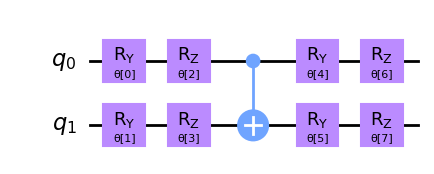

In [6]:
ansatz = EfficientSU2(H_op.num_qubits, reps=1)
ansatz.decompose().draw('mpl')

In [7]:
init_param_values={}
for i in range(len(ansatz.parameters)):
    init_param_values[ansatz.parameters[i]]=np.pi/2
print(init_param_values)

{ParameterVectorElement(θ[0]): 1.5707963267948966, ParameterVectorElement(θ[1]): 1.5707963267948966, ParameterVectorElement(θ[2]): 1.5707963267948966, ParameterVectorElement(θ[3]): 1.5707963267948966, ParameterVectorElement(θ[4]): 1.5707963267948966, ParameterVectorElement(θ[5]): 1.5707963267948966, ParameterVectorElement(θ[6]): 1.5707963267948966, ParameterVectorElement(θ[7]): 1.5707963267948966}


In [8]:
# from qiskit.algorithms.time_evolvers.variational import ImaginaryMcLachlanPrinciple

var_principle = ImaginaryMcLachlanPrinciple()

In [9]:
# from qiskit.algorithms import TimeEvolutionProblem

exp_time = 5.0
aux_ops = [H_op]
evolution_problem = TimeEvolutionProblem(H_op, exp_time, aux_operators=aux_ops)

In [10]:
# # from qiskit.algorithms import VarQITE
# # from qiskit.primitives import Estimator
# start_time = time.time()
# var_qite = VarQITE(ansatz, init_param_values, var_principle, Estimator())
# # an Estimator instance is necessary, if we want to calculate the expectation value of auxiliary operators.
# evolution_result = var_qite.evolve(evolution_problem)
# end_time = time.time()
# elapsed_time = end_time - start_time

# print("Elapsed time: ", elapsed_time, " seconds")

In [11]:
# print(evolution_result)

In [12]:
# print(evolution_result.evolved_state)
# circ = evolution_result.evolved_state
# print(circ)

In [13]:
backend = Aer.get_backend('statevector_simulator')
# job = execute(circ, backend)
# result = job.result()
# statevector = result.get_statevector()

# print(statevector)


In [14]:
# k = np.asarray(statevector)
# new_k = [np.round(x) for x in k]
# print(k)
# print(new_k)

In [15]:
#from qiskit.algorithms.gradients import ReverseEstimatorGradient, ReverseQGT
start_time = time.time()
var_principle = ImaginaryMcLachlanPrinciple(qgt = ReverseQGT() , gradient = ReverseEstimatorGradient())
evolution_problem = TimeEvolutionProblem(H_op, exp_time, aux_operators=aux_ops)
var_qite = VarQITE(ansatz, init_param_values, var_principle, Estimator())
evolution_result_eff = var_qite.evolve(evolution_problem)
end_time = time.time()
elapsed_time = end_time - start_time

print("Elapsed time: ", elapsed_time, " seconds")

Elapsed time:  68.83682513237  seconds


In [16]:
# print(evolution_result_eff.evolved_state)
eff_circ = evolution_result_eff.evolved_state
# print(eff_circ)

In [17]:
eff_job = execute(eff_circ, backend)
eff_result = eff_job.result()
eff_statevector = eff_result.get_statevector()

print(eff_statevector)


Statevector([-5.55111512e-16+3.92741395e-15j,
             -5.00000000e-01+5.00000000e-01j,
              5.00000000e-01-5.00000000e-01j,
             -3.63598041e-15+1.38777878e-15j],
            dims=(2, 2))


In [18]:
final_sv = [np.round(x) for x in np.asarray(eff_statevector)]

print(final_sv)

[(-0+0j), (-1+0j), (1-0j), (-0+0j)]


In [19]:
print(evolution_result_eff)

{   'aux_ops_evaluated': [(-6.000000000000002, {})],
    'evolved_state': <qiskit.circuit.library.n_local.efficient_su2.EfficientSU2 object at 0x000001BC7F9E7DC0>,
    'observables': [   [(1.0000000000000002, {})],
                       [(0.506620907772628, {})],
                       [(0.019328831623777132, {})],
                       [(-0.4571597363951444, {})],
                       [(-0.9186606251426965, {})],
                       [(-1.3616381846652135, {})],
                       [(-1.7832612070392275, {})],
                       [(-2.1814059627664877, {})],
                       [(-2.5546205738023424, {})],
                       [(-2.9020668172233073, {})],
                       [(-3.2234521551204987, {})],
                       [(-3.5189586679258733, {})],
                       [(-3.7891703945504003, {})],
                       [(-4.03499888165697, {})],
                       [(-4.257608097685336, {})],
                       [(-4.458341890347179, {})],
          

In [20]:
h_exp_val_eff = np.array([ele[0][0] for ele in evolution_result_eff.observables])
h_exp_val_eff[-1]

-6.000000000000002

In [21]:
# from qiskit.quantum_info import Statevector

init_state = Statevector(ansatz.assign_parameters(init_param_values))

In [22]:
# from qiskit.algorithms import SciPyImaginaryEvolver

evolution_problem = TimeEvolutionProblem(H_op, exp_time, initial_state=init_state, aux_operators=aux_ops)
exact_evol = SciPyImaginaryEvolver(num_timesteps=501)
sol = exact_evol.evolve(evolution_problem)

In [23]:
# import pylab

h_exp_val = np.array([ele[0][0] for ele in evolution_result.observables])

exact_h_exp_val = sol.observables[0][0].real

times = evolution_result.times
pylab.plot(times, h_exp_val, label= "VarQITE")
pylab.plot(times, exact_h_exp_val , label= "Exact",  linestyle='--')
pylab.xlabel("Time")
pylab.ylabel(r"$\langle H \rangle$ (energy)")
pylab.legend(loc="upper right");

NameError: name 'evolution_result' is not defined

In [24]:
print("Calculated Ground state energy", h_exp_val[-1])
print("Exact Ground state energy",exact_h_exp_val[-1])

NameError: name 'h_exp_val' is not defined

In [25]:
#from qiskit.algorithms.gradients import ReverseEstimatorGradient, ReverseQGT
start_time = time.time()
var_principle = ImaginaryMcLachlanPrinciple(qgt = ReverseQGT() , gradient = ReverseEstimatorGradient())
evolution_problem = TimeEvolutionProblem(H_op, exp_time, aux_operators=aux_ops)
var_qite = VarQITE(ansatz, init_param_values, var_principle, Estimator())
evolution_result_eff = var_qite.evolve(evolution_problem)
end_time = time.time()
elapsed_time = end_time - start_time

print("Elapsed time: ", elapsed_time, " seconds")

Elapsed time:  67.86237668991089  seconds


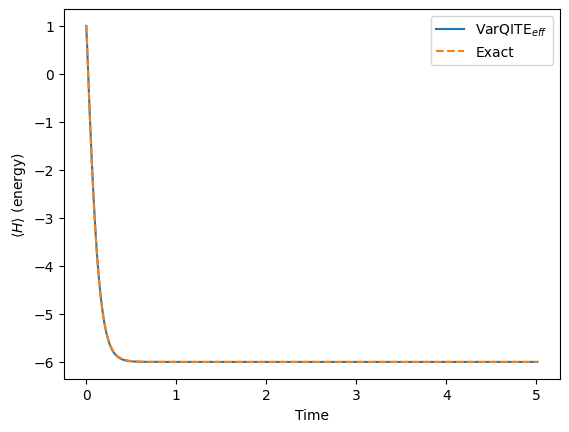

In [26]:
h_exp_val_eff = np.array([ele[0][0] for ele in evolution_result_eff.observables])

exact_h_exp_val_eff = sol.observables[0][0].real

times = evolution_result_eff.times
pylab.plot(times, h_exp_val_eff, label= r"VarQITE$_{eff}$")
pylab.plot(times, exact_h_exp_val_eff , label= "Exact",  linestyle='--')
pylab.xlabel("Time")
pylab.ylabel(r"$\langle H \rangle$ (energy)")
pylab.legend(loc="upper right");

In [27]:
print("Ground state energy", h_exp_val_eff[-1])

Ground state energy -6.000000000000002


In [28]:
pylab.plot(times, (h_exp_val-exact_h_exp_val), label= "VarQITE")
pylab.plot(times, (h_exp_val_eff-exact_h_exp_val_eff), label= r"VarQITE$_{eff}$",  linestyle='--')
pylab.xlabel("Time")
pylab.ylabel(r"$\Delta \langle H \rangle$")
pylab.legend(loc="upper right");

NameError: name 'h_exp_val' is not defined